In [1]:
# importing libraries
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import ast

In [2]:
# load_dataset("lukebarousse/data_jobs")

In [3]:
data = load_dataset("lukebarousse/data_jobs")

In [4]:
df = data["train"].to_pandas()
# cleaning data
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df.loc[:,"job_skills"] = df.loc[:,"job_skills"].apply(func=(lambda skills_list : ast.literal_eval(skills_list) if pd.notna(skills_list) else skills_list))
df_exploded = df.explode(column="job_skills").copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [6]:
df_skill_count = (df_exploded
                  .groupby(by=["job_title_short", "job_skills"])
                  .size()
                  .reset_index()
                  .rename(columns={0:"skill_count"})
                  .sort_values(by="skill_count", ascending=False))

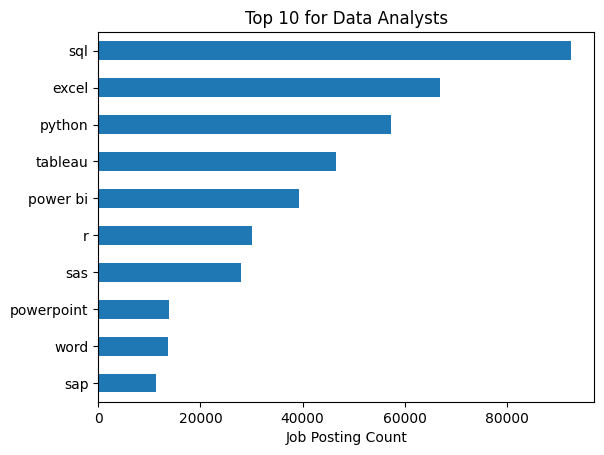

In [7]:
job_title = "Data Analyst"
top_skills_count = 10
role_top_skills = df_skill_count[df_skill_count["job_title_short"] == job_title].head(top_skills_count)
role_top_skills.plot(kind="barh", x="job_skills", y="skill_count")
plt.gca().invert_yaxis()
plt.title(f"Top {top_skills_count} for {job_title}s")
plt.xlabel("Job Posting Count")
plt.ylabel("")
plt.legend().set_visible(False)
plt.show()